In [126]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [127]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLALchemy ORM

In [128]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [129]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [130]:
# reflect an existing database into a new model
Base = automap_base()

Base.prepare(engine, reflect=True)

# reflect the tables

Base.classes.keys()

['measurement', 'station']

In [131]:
# View all of the classes that automap found
Measurement = Base.classes.measurement

Station = Base.classes.station

session = Session(engine)

first_row = session.query(Measurement).first()
first_row.__dict__

first_row = session.query(Station).first()
first_row.__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fd141aa4670>,
 'id': 1,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'elevation': 3.0}

In [132]:
results = session.query(Measurement).first()
results.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fd141bb83a0>,
 'date': '2010-01-01',
 'station': 'USC00519397',
 'prcp': 0.08,
 'id': 1,
 'tobs': 65.0}

In [133]:
# Save references to each table

Measurement = Base.classes.measurement

Station = Base.classes.station


In [134]:
# Create our session (link) from Python to the DB
session = Session(engine)

session

## Bonus Challenge Assignment: Temperature Analysis II

In [135]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
     
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))


[(62.0, 69.57142857142857, 74.0)]


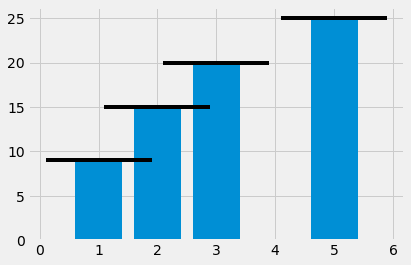

In [158]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set

#calc_temps('2017-08-01','2017-08-07')


#session.query((Measurement.station) == 'tobs').count()

# start = "2017-08-01"

# end = "2017-08-07"

#session.query(function).all()


# session.query(Measurement.tobs).all()

# max_min = 72 + 83 

# two = 2

# AVG = max_min / two

# min_temp = 72.0

# max_temp = 83.0

# avg_temp = 79.25
# function

# function

# max_min

# AVG

temp = calc_temps('2016-08-01','2017-08-01')[0]

# x = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs)).\
# filter(Measurement.date >=start).filter(Measurement.date <= end).all()


# Y = str(y)

# y = session.query(func.avg(Measurement.tobs)).\
# filter(Measurement.date >=start).filter(Measurement.date <= end).all()
# Y
# X = str(x)
Y = [0]

tmin_max = temp[0]-temp[2]

tavg = temp[1]

tmax = temp[2]
tmin = temp[0]
tmin_max

-29.0

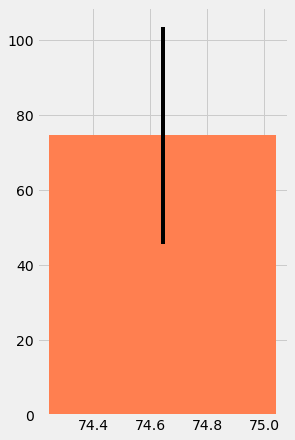

In [165]:
# Plot the results from your previous query as a bar chart. 
# x = ['Nuclear', 'Hydro', 'Gas', 'Oil', 'Coal', 'Biofuel']
# energy = [5, 6, 15, 22, 24, 8]
# variance = [1, 2, 7, 4, 2, 3]

#x_pos = [i for i, _ in enumerate(tmin_max)]
plt.figure(figsize=(4,7))
plt.bar(tavg, tavg, color='coral', yerr=tmin_max)
# plt.xlabel("Energy Source")
# plt.ylabel("Energy Output (GJ)")
# plt.title("Energy output from various fuel sources")

#plt.xticks(tmin_max, tavg)

plt.show()
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


### Daily Rainfall Average

In [125]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation


### Daily Temperature Normals

In [15]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [16]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2017-08-01'
end_date = '2017-08-07'

# Use the start and end date to create a range of dates


# Strip off the year and save a list of strings in the format %m-%d


# Use the `daily_normals` function to calculate the normals for each date string 
# and append the results to a list called `normals`.


In [17]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

In [ ]:
# Plot the daily normals as an area plot with `stacked=False`

## Close Session